In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

## Training Set 

In [3]:
df_train=pd.read_csv('pre-anforcom_train.csv')
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0


In [4]:
df_train.shape

(24631, 22)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24631 entries, 0 to 24630
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              24631 non-null  int64  
 1   age             24631 non-null  int64  
 2   job             24631 non-null  object 
 3   marital         24631 non-null  object 
 4   education       24631 non-null  object 
 5   default         24631 non-null  object 
 6   housing         24631 non-null  object 
 7   loan            24631 non-null  object 
 8   contact         24631 non-null  object 
 9   month           24631 non-null  object 
 10  day_of_week     24631 non-null  object 
 11  duration        24631 non-null  int64  
 12  campaign        24631 non-null  int64  
 13  pdays           24631 non-null  int64  
 14  previous        24631 non-null  int64  
 15  poutcome        24631 non-null  object 
 16  emp.var.rate    24631 non-null  float64
 17  cons.price.idx  24631 non-null 

In [6]:
df_train.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
is_subscribed     0
dtype: int64

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train['is_subscribed'].value_counts()

is_subscribed
0    21882
1     2749
Name: count, dtype: int64

In [9]:
df_train['job'].value_counts() #nominal

job
admin.           6171
blue-collar      5586
technician       4037
services         2340
management       1816
retired          1031
entrepreneur      880
self-employed     840
housemaid         618
unemployed        596
student           528
unknown           188
Name: count, dtype: int64

In [10]:
df_train['marital'].value_counts() #nominal

marital
married     14914
single       6924
divorced     2747
unknown        46
Name: count, dtype: int64

In [11]:
df_train['default'].value_counts() #nominal

default
no         19473
unknown     5158
Name: count, dtype: int64

In [12]:
df_train['housing'].value_counts() #nominal

housing
yes        12870
no         11167
unknown      594
Name: count, dtype: int64

In [13]:
df_train['loan'].value_counts() #nominal

loan
no         20283
yes         3754
unknown      594
Name: count, dtype: int64

In [14]:
df_train['contact'].value_counts() #nominal

contact
cellular     15659
telephone     8972
Name: count, dtype: int64

In [15]:
df_train['poutcome'].value_counts() #nominal

poutcome
nonexistent    21298
failure         2513
success          820
Name: count, dtype: int64

#### Nominal Features
- job 
- marital
- default
- housing
- loan
- contact
- poutcome

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['job'] = label_encoder.fit_transform(df_train['job'])
df_train['marital'] = label_encoder.fit_transform(df_train['marital'])
df_train['default'] = label_encoder.fit_transform(df_train['default'])
df_train['housing'] = label_encoder.fit_transform(df_train['housing'])
df_train['loan'] = label_encoder.fit_transform(df_train['loan'])
df_train['contact'] = label_encoder.fit_transform(df_train['contact'])
df_train['poutcome'] = label_encoder.fit_transform(df_train['poutcome'])
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,7,1,high.school,1,0,0,1,may,mon,149,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,0,1,basic.6y,0,0,0,1,may,mon,151,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,7,1,high.school,0,0,2,1,may,mon,307,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,7,2,high.school,0,2,0,1,may,mon,50,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,1,2,high.school,0,0,2,1,may,mon,137,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0


#### Ordinal Features 
- education
- month
- day_of_week

In [17]:
df_train['education'].value_counts()

education
university.degree      7328
high.school            5702
basic.9y               3652
professional.course    3115
basic.4y               2459
basic.6y               1360
unknown                1006
illiterate                9
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['illiterate', 'unknown', 'basic.4y', 'basic.6y', 
                                              'basic.9y', 'high.school', 'university.degree', 'professional.course']])
df_train['education'] = ordinal_encoder.fit_transform(df_train[['education']])
df_train['education'] = df_train['education'].astype(int)
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,7,1,5,1,0,0,1,may,mon,149,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,0,1,3,0,0,0,1,may,mon,151,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,7,1,5,0,0,2,1,may,mon,307,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,7,2,5,0,2,0,1,may,mon,50,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,1,2,5,0,0,2,1,may,mon,137,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0


In [19]:
df_train['month'].value_counts()

month
may    8187
jul    4325
aug    3679
jun    3253
nov    2451
apr    1526
oct     435
sep     339
mar     327
dec     109
Name: count, dtype: int64

In [20]:
ordinal_encoder = OrdinalEncoder(categories=[['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
df_train['month'] = ordinal_encoder.fit_transform(df_train[['month']])
df_train['month'] = df_train['month'].astype(int)
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,7,1,5,1,0,0,1,2,mon,149,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,0,1,3,0,0,0,1,2,mon,151,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,7,1,5,0,0,2,1,2,mon,307,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,7,2,5,0,2,0,1,2,mon,50,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,1,2,5,0,0,2,1,2,mon,137,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0


In [21]:
df_train['day_of_week'].value_counts()

day_of_week
thu    5210
mon    5181
wed    4837
tue    4724
fri    4679
Name: count, dtype: int64

In [22]:
ordinal_encoder = OrdinalEncoder(categories=[['mon', 'tue', 'wed', 'thu', 'fri']])
df_train['day_of_week'] = ordinal_encoder.fit_transform(df_train[['day_of_week']])
df_train['day_of_week'] = df_train['day_of_week'].astype(int)
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,7,1,5,1,0,0,1,2,0,149,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,0,1,3,0,0,0,1,2,0,151,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,7,1,5,0,0,2,1,2,0,307,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,7,2,5,0,2,0,1,2,0,50,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,1,2,5,0,0,2,1,2,0,137,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0


## Testing Set 

In [23]:
df_test=pd.read_csv('pre-anforcom_test.csv')
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,73,retired,married,basic.6y,no,no,no,telephone,aug,tue,672,2,999,4,failure,-1.7,94027.0,-38.3,0.897794,4991.6
1,1,38,unemployed,married,basic.4y,unknown,yes,no,telephone,jul,tue,156,1,999,0,nonexistent,1.4,93918.0,-42.7,4961.000000,5228.1
2,2,33,blue-collar,married,high.school,no,yes,no,cellular,jun,mon,110,2,999,0,nonexistent,-2.9,92963.0,-40.8,1281.000000,5076.2
3,3,36,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,thu,264,3,999,0,nonexistent,1.4,93918.0,-42.7,4958.000000,5228.1
4,4,28,technician,single,high.school,no,no,no,cellular,mar,fri,354,2,999,0,nonexistent,-1.8,92843.0,-50.0,1531.000000,5099.1


In [24]:
df_test.shape

(14619, 21)

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test['job'] = label_encoder.fit_transform(df_test['job'])
df_test['marital'] = label_encoder.fit_transform(df_test['marital'])
df_test['default'] = label_encoder.fit_transform(df_test['default'])
df_test['housing'] = label_encoder.fit_transform(df_test['housing'])
df_test['loan'] = label_encoder.fit_transform(df_test['loan'])
df_test['contact'] = label_encoder.fit_transform(df_test['contact'])
df_test['poutcome'] = label_encoder.fit_transform(df_test['poutcome'])
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,73,5,1,basic.6y,0,0,0,1,aug,tue,672,2,999,4,0,-1.7,94027.0,-38.3,0.897794,4991.6
1,1,38,10,1,basic.4y,1,2,0,1,jul,tue,156,1,999,0,1,1.4,93918.0,-42.7,4961.000000,5228.1
2,2,33,1,1,high.school,0,2,0,0,jun,mon,110,2,999,0,1,-2.9,92963.0,-40.8,1281.000000,5076.2
3,3,36,1,1,basic.9y,1,2,0,1,jul,thu,264,3,999,0,1,1.4,93918.0,-42.7,4958.000000,5228.1
4,4,28,9,2,high.school,0,0,0,0,mar,fri,354,2,999,0,1,-1.8,92843.0,-50.0,1531.000000,5099.1


In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['illiterate', 'unknown', 'basic.4y', 'basic.6y', 
                                              'basic.9y', 'high.school', 'university.degree', 'professional.course']])
df_test['education'] = ordinal_encoder.fit_transform(df_test[['education']])
df_test['education'] = df_test['education'].astype(int)
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,73,5,1,3,0,0,0,1,aug,tue,672,2,999,4,0,-1.7,94027.0,-38.3,0.897794,4991.6
1,1,38,10,1,2,1,2,0,1,jul,tue,156,1,999,0,1,1.4,93918.0,-42.7,4961.000000,5228.1
2,2,33,1,1,5,0,2,0,0,jun,mon,110,2,999,0,1,-2.9,92963.0,-40.8,1281.000000,5076.2
3,3,36,1,1,4,1,2,0,1,jul,thu,264,3,999,0,1,1.4,93918.0,-42.7,4958.000000,5228.1
4,4,28,9,2,5,0,0,0,0,mar,fri,354,2,999,0,1,-1.8,92843.0,-50.0,1531.000000,5099.1


In [27]:
ordinal_encoder = OrdinalEncoder(categories=[['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
df_test['month'] = ordinal_encoder.fit_transform(df_test[['month']])
df_test['month'] = df_test['month'].astype(int)
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,73,5,1,3,0,0,0,1,5,tue,672,2,999,4,0,-1.7,94027.0,-38.3,0.897794,4991.6
1,1,38,10,1,2,1,2,0,1,4,tue,156,1,999,0,1,1.4,93918.0,-42.7,4961.000000,5228.1
2,2,33,1,1,5,0,2,0,0,3,mon,110,2,999,0,1,-2.9,92963.0,-40.8,1281.000000,5076.2
3,3,36,1,1,4,1,2,0,1,4,thu,264,3,999,0,1,1.4,93918.0,-42.7,4958.000000,5228.1
4,4,28,9,2,5,0,0,0,0,0,fri,354,2,999,0,1,-1.8,92843.0,-50.0,1531.000000,5099.1


In [28]:
ordinal_encoder = OrdinalEncoder(categories=[['mon', 'tue', 'wed', 'thu', 'fri']])
df_test['day_of_week'] = ordinal_encoder.fit_transform(df_test[['day_of_week']])
df_test['day_of_week'] = df_test['day_of_week'].astype(int)
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,73,5,1,3,0,0,0,1,5,1,672,2,999,4,0,-1.7,94027.0,-38.3,0.897794,4991.6
1,1,38,10,1,2,1,2,0,1,4,1,156,1,999,0,1,1.4,93918.0,-42.7,4961.000000,5228.1
2,2,33,1,1,5,0,2,0,0,3,0,110,2,999,0,1,-2.9,92963.0,-40.8,1281.000000,5076.2
3,3,36,1,1,4,1,2,0,1,4,3,264,3,999,0,1,1.4,93918.0,-42.7,4958.000000,5228.1
4,4,28,9,2,5,0,0,0,0,0,4,354,2,999,0,1,-1.8,92843.0,-50.0,1531.000000,5099.1


## Model Training 

In [29]:
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,7,1,5,1,0,0,1,2,0,149,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,0,1,3,0,0,0,1,2,0,151,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,7,1,5,0,0,2,1,2,0,307,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,7,2,5,0,2,0,1,2,0,50,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,1,2,5,0,0,2,1,2,0,137,1,999,0,1,1.1,93994.0,-36.4,4857.0,5191.0,0


In [30]:
df_train['is_subscribed'].value_counts()

is_subscribed
0    21882
1     2749
Name: count, dtype: int64

In [31]:
#variable independen
X = df_train.drop(['is_subscribed'], axis=1)
#variable dependen
y = df_train['is_subscribed']

In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=30)
X_resampled, y_resampled = smt.fit_resample(X, y)

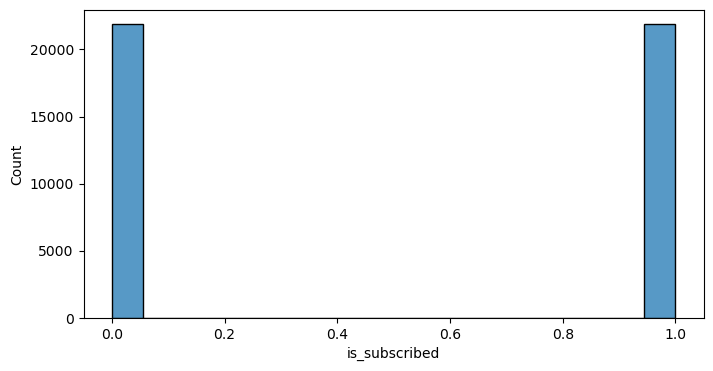

In [33]:
fig=plt.subplots(figsize=(8,4))
sns.histplot(data=y_resampled)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35011, 21)
(8753, 21)
(35011,)
(8753,)


### Decision Tree 

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_pred_DT))

weighted_f1_DT = f1_score(y_test, y_pred_DT, average='weighted')
print("Weighted Average F1 Score:", weighted_f1_DT)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4391
           1       0.92      0.93      0.92      4362

    accuracy                           0.92      8753
   macro avg       0.92      0.92      0.92      8753
weighted avg       0.92      0.92      0.92      8753

Weighted Average F1 Score: 0.9233373550042299


### Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_pred_RF))

weighted_f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
print("Weighted Average F1 Score:", weighted_f1_RF)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4391
           1       0.93      0.97      0.95      4362

    accuracy                           0.95      8753
   macro avg       0.95      0.95      0.95      8753
weighted avg       0.95      0.95      0.95      8753

Weighted Average F1 Score: 0.9502849019689057


### XGBoost 

In [39]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)
y_pred_XGB = model_XGB.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_pred_XGB))

weighted_f1_XGB = f1_score(y_test, y_pred_XGB, average='weighted')
print("Weighted Average F1 Score:", weighted_f1_XGB)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4391
           1       0.93      0.96      0.95      4362

    accuracy                           0.95      8753
   macro avg       0.95      0.95      0.95      8753
weighted avg       0.95      0.95      0.95      8753

Weighted Average F1 Score: 0.9458354311983862


In [41]:
models = pd.DataFrame(
    {
        'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
        'Mean F1-Score': [weighted_f1_DT, weighted_f1_RF, weighted_f1_XGB]
    }
)
models.sort_values(by='Mean F1-Score', ascending=False)

,Model,Mean F1-Score
1,Random Forest,0.950285
2,XGBoost,0.945835
0,Decision Tree,0.923337


## Tuning The Best Algorithm 

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

custom_scorer = make_scorer(f1_score, average='weighted')
random_search = RandomizedSearchCV(model_RF, parameters, cv=5, scoring=custom_scorer)
random_search.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring=make_scorer(f1_score, average=weighted))

In [43]:
random_search.best_score_

0.9380382522541078

In [44]:
model_RF_tuned = random_search.best_estimator_

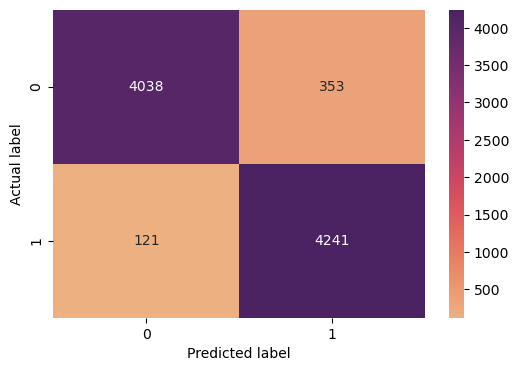

In [45]:
from sklearn.metrics import confusion_matrix

y_pred_RF_tuned = model_RF_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred_RF_tuned)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='flare', fmt='d')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

In [46]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      4391
           1       0.92      0.97      0.95      4362

    accuracy                           0.95      8753
   macro avg       0.95      0.95      0.95      8753
weighted avg       0.95      0.95      0.95      8753



## Model Testing 

In [47]:
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,73,5,1,3,0,0,0,1,5,1,672,2,999,4,0,-1.7,94027.0,-38.3,0.897794,4991.6
1,1,38,10,1,2,1,2,0,1,4,1,156,1,999,0,1,1.4,93918.0,-42.7,4961.000000,5228.1
2,2,33,1,1,5,0,2,0,0,3,0,110,2,999,0,1,-2.9,92963.0,-40.8,1281.000000,5076.2
3,3,36,1,1,4,1,2,0,1,4,3,264,3,999,0,1,1.4,93918.0,-42.7,4958.000000,5228.1
4,4,28,9,2,5,0,0,0,0,0,4,354,2,999,0,1,-1.8,92843.0,-50.0,1531.000000,5099.1


In [48]:
print(df_test.shape)

(14619, 21)


In [49]:
y_test_pred = model_RF_tuned.predict(df_test)

In [50]:
submission = pd.DataFrame({'id' : df_test['id'], 'is_subscribed' : y_test_pred})
submission

,id,is_subscribed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
14614,14614,0
14615,14615,0
14616,14616,1
14617,14617,0


In [51]:
submission.to_csv('pre-anforcom_submission.csv',index=False)

# Public score: 0.81345